(-5.000776486560142, 5.415507426545621)

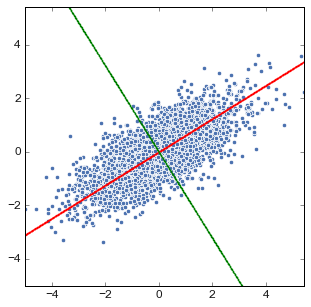

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setup for figures
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.set()

# sample from multivariate normal
true_covMat = [[2,1],[1,1]]
x = np.random.multivariate_normal(mean=[0,0], cov=true_covMat, size=3000)

# compute statistics
meanVec = np.mean(x,axis=0)
centralized_x = x - meanVec
sample_covMat = np.matmul(centralized_x.transpose(), centralized_x)

# eigendecomposition
u,s,vh = np.linalg.svd(sample_covMat)

# plot samples and axis obtained by eigen decomposition
dotNum = 1000
longaxis = np.zeros((dotNum,2))
longaxis[:,0] = np.linspace(x[:,0].min(), x[:,0].max(), dotNum)
longaxis[:,1] = longaxis[:,0] * u[0,1] / u[0,0]

shortaxis = np.zeros((dotNum,2))
shortaxis[:,0] = np.linspace(x[:,0].min(), x[:,0].max(), dotNum)
shortaxis[:,1] = shortaxis[:,0] * u[1,1] / u[1,0]

sns.scatterplot(x=x[:,0], y=x[:,1])
sns.scatterplot(x=longaxis[:,0], y=longaxis[:,1], color='red', s=2, linewidth='0', ax=ax)
sns.scatterplot(x=shortaxis[:,0], y=shortaxis[:,1], color='green', s=2, linewidth='0', ax=ax)
ax.set_xlim(x[:,0].min(), x[:,0].max())
ax.set_ylim(x[:,0].min(), x[:,0].max())

(-4.522571562577549, 4.153224828684814)

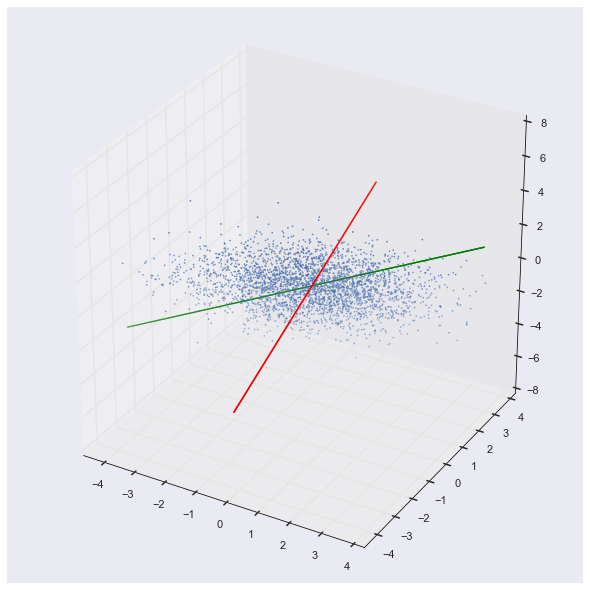

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# setup for figures
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

# sample from multivariate normal
true_covMat = [[2,1,0],[1,1,-1],[0,-1,3]]
x = np.random.multivariate_normal(mean=[0,0,0], cov=true_covMat, size=3000)

# compute statistics
meanVec = np.mean(x,axis=0)
centralized_x = x - meanVec
sample_covMat = np.matmul(centralized_x.transpose(), centralized_x)

# eigendecomposition
u,s,vh = np.linalg.svd(sample_covMat)

# plot samples and axis obtained by eigen decomposition
dotNum = 1000
longaxis = np.zeros((dotNum,3))
longaxis[:,0] = np.linspace(x[:,0].min(), x[:,0].max(), dotNum)
longaxis[:,1] = longaxis[:,0] * u[0,1] / u[0,0]
longaxis[:,2] = longaxis[:,0] * u[0,2] / u[0,0]

shortaxis = np.zeros((dotNum,3))
shortaxis[:,0] = np.linspace(x[:,0].min(), x[:,0].max(), dotNum)
shortaxis[:,1] = shortaxis[:,0] * u[-1,1] / u[-1,0]
shortaxis[:,2] = shortaxis[:,0] * u[-1,2] / u[-1,0]

ax.scatter(xs=x[:,0], ys=x[:,1], zs=x[:,2], s=3, linewidth='0')
ax.scatter(xs=longaxis[:,0], ys=longaxis[:,1], zs=longaxis[:,2], c='red', s=2, linewidth='0')
ax.scatter(xs=shortaxis[:,0], ys=shortaxis[:,1], zs=shortaxis[:,1], c='green', s=2, linewidth='0')
ax.set_xlim(x[:,0].min(), x[:,0].max())
ax.set_ylim(x[:,0].min(), x[:,0].max())